In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations

In [12]:
directory = 'scraped_data/'
file = '20170101wellness20200701.json'

In [15]:
df = pd.read_json(directory+file)
top_claps_df = df[df['claps']>1000]

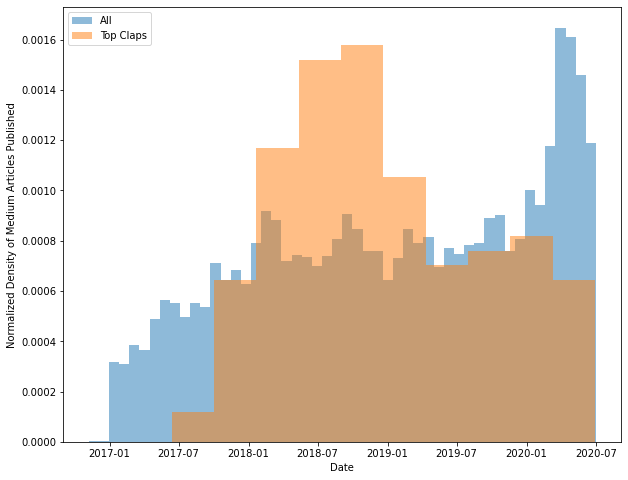

In [21]:
plt.figure(figsize=[10,8])
plt.hist(df['date'], bins=50, alpha=0.5, density=True, label = 'All')
plt.hist(top_claps_df['date'], bins=10, alpha=0.5, density=True, label='Top Claps')
plt.xlabel('Date')
plt.ylabel('Normalized Density of Medium Articles Published')
plt.legend()
plt.show()

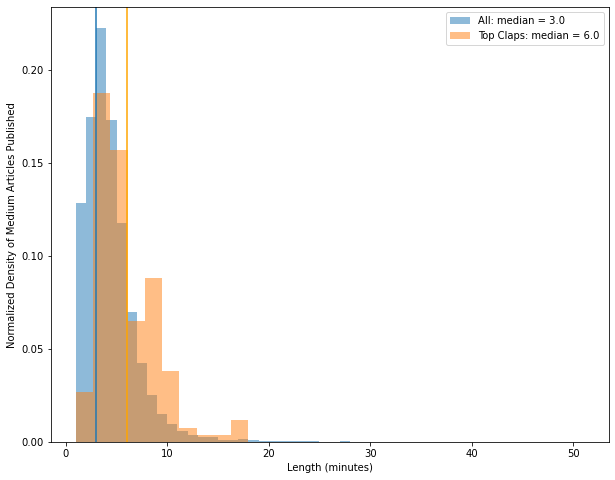

In [45]:
plt.figure(figsize=[10,8])
plt.hist(df['length'], bins=50, alpha=0.5, density=True, label = 'All: median = {0}'.format(np.median(df['length'])))
plt.hist(top_claps_df['length'], bins=10, alpha=0.5, density=True, label='Top Claps: median = {0}'.format(np.median(top_claps_df['length'])))

plt.axvline(np.median(df['length']))
plt.axvline(np.median(top_claps_df['length']), color ='orange')


plt.xlabel('Length (minutes)')
plt.ylabel('Normalized Density of Medium Articles Published')
plt.legend()
plt.show()

In [36]:
for author in top_claps_df['author']:
    print(author)

Donald M. Rattner, Architect
Olark
inc. magazine
Bridget Pujals
Debby Germino
Kelly Dudzik
Teresa Colón
Rewire, Inc.
Ally Holland
Chelsey Engel
Debby Germino
Sah Kilic
Jessica Wildfire
Tom Alaimo
Ryan Goodwin
Teresa Colón
Jessica Wildfire
Sharon Salzberg
Dr. Jason Fung
Maria Cross MSc
Washington Post
Luke Ves.
Laura Morin
Saira Gill
Francesco Agnoletto
Shawn Casey
Heidi Dellaire
Anna Breslin
Julia E Hubbel
Manjul Rathee
Gideon M-K; Health Nerd
Anne Peterson
Dr. Jason Fung
Megan Holstein
Dr. Jason Fung
uBiome
Dr. Jason Fung
Alexia Bonatsos
Karin Nielsen
Dr. Jason Fung
Dr. Jason Fung
Laura Morin
Dr. Jason Fung
Prachir Pasricha
Manjul Rathee
Laura Khoudari
Randy Shingler
Sarthak Sharma
Dr. Jason Fung
John Gorman
The Economist
StillJustJames
John Gorman
Esquire
Sam Westreich, PhD
Dr. Jason Fung
Ben Werdmuller
Sarah Healy
Karen Nimmo
AJ Jones
Tamara Claunch, MEd
Dr. Jason Fung
Michelle Roth Baade
CH Care
Dr. Jason Fung
Dr. Jason Fung
Andrew Merle
Ali Kurtulmus
Daniel J. Schultz, MS, RD
Jess

In [ ]:
titles = ['Dr.', 'Dr',
          'PhD', 'Ph.D', 'Ph.D.',
          'MS', 'M.S.', 'M.S', 'MSc', 'M.Sc', 'M.Sc.',
          'MD', 'M.D.', 'M.D',
          'MA', 'M.A', 'M.A.',
          'MEd', 'M.Ed', 'M.Ed.',
         ]

In [39]:
top_claps_df['author'].iloc[100]

'Dr. Jason Fung'

In [41]:
Counter(top_claps_df['author']).most_common(10)

[('Dr. Jason Fung', 20),
 ('Zach J. Payne', 9),
 ('Jessica Wildfire', 4),
 ('Zulie Rane', 4),
 ('John Gorman', 3),
 ('Andrew Merle', 3),
 ('Zack Harris', 3),
 ('Debby Germino', 2),
 ('Teresa Colón', 2),
 ('Maria Cross MSc', 2)]

In [43]:
Counter(df['author']).most_common(20)

[('Michael Hunter MD', 138),
 ('Thriive Art & Soul', 129),
 ('Blue Ridge Hemp', 112),
 ('Nicole Akers', 96),
 ('HealthTap', 95),
 ('Johnson Memorial Health', 82),
 ('Brittany Denis, DPT', 68),
 ('Edward F. T. Charfauros', 67),
 ('Lindsey Elmore, PharmD, BCPS', 66),
 ('Sonee Singh', 64),
 ('KIERO NOVEDADES', 61),
 ('Veronica Thompson', 58),
 ('Andrea Scoretz', 53),
 ('VIM & VIGR', 52),
 ('Beauty & Wellness Blog', 49),
 ('Ross Yeoman', 46),
 ('Dave Smurthwaite', 43),
 ('Cari.', 40),
 ('Leland Stillman, MD', 40),
 ('Julia E Hubbel', 39)]

questions to ask:
- do people with titles get more claps?
- are companies more likely to get more claps than individuals?

In [48]:
example = Counter(df['author']).most_common(20)[6][0]

In [50]:
import re

In [65]:
re.findall(', (.\w)+', example)

['DP']

In [61]:
example

'Brittany Denis, DPT'

In [70]:
example.split(', ')[1]

'DPT'

In [72]:
'name asd'.split(', ')

['name asd']

In [74]:
titles = set([author.split(', ')[1] for author in df['author'] if ', ' in author])

In [75]:
titles

{'AAP',
 'ACC',
 'AMFT',
 'Another Year',
 'Architect',
 'Aromahead Institute',
 'Author',
 'B.S. NBC-HWC',
 'BHS',
 'BSN',
 'BSc (Hons)',
 'BTech(sp)',
 'Beauty & Fitness',
 'CEO LGBT Foundation.',
 'CFP®',
 'CHN',
 'CMP',
 'CMT',
 'CNTP',
 'CPCC',
 'CPT',
 'CSCS',
 'CSP',
 'Camilla!',
 'Certified Reflexologist',
 'Codependency Recovery Coach',
 'D.C.',
 'D.O.',
 'D.Sc.',
 'DACM',
 'DC',
 'DMA',
 'DNP',
 'DO',
 'DPT',
 'Ed. D.',
 'EdD',
 'Esq.',
 'FAAIM',
 'FNP',
 'Fitlandia',
 'Founder @ Nature of Work',
 'Founder of Isbel™',
 'GreatnessMagnified.com',
 'HHP',
 'ICADC',
 'INHC',
 'Inc',
 'Inc.',
 'J.D.',
 'JD',
 'Jr.',
 'K.',
 'L.Ac.',
 'LAc',
 'LCSW',
 'LCSW-R',
 'LCSWA',
 'LICSW',
 'LLC',
 'LMFT',
 'LMHC',
 'LMHP-R',
 'LMSW',
 'LPC',
 'LPC-MHSP',
 'LiveBetter Coach',
 'M.A.',
 'M.D.',
 'M.Div.',
 'M.Ed.',
 'M.S.',
 'M.S.W.',
 'MA',
 'MACP',
 'MBA',
 'MBBS BSc',
 'MCC',
 'MCRP',
 'MD',
 'MD MPH',
 'MD MSCE',
 'MD MSc',
 'MD ND',
 'MEd',
 'MFA/LMT',
 'MND',
 'MPH',
 'MPH in Nutrition